<a href="https://colab.research.google.com/github/gzsomm/BOOSTING-ALGORITHMS/blob/main/Proyecto_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Carga de datos**

In [39]:
# Instalo paquetes que utilizaré
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [40]:
# Cargo la base de datos

bbdd = pd.read_csv ("https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv")
df = pd.DataFrame (bbdd)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


####**Análisis exploratorio**

In [41]:
df.shape

(768, 9)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Todas las variables son númericas. No registran casos nulos.

In [43]:
# Verifico valores duplicados. Elimino en caso que los haya.

df.drop_duplicates (subset = df.columns, keep = "first", inplace = True)
df.shape # No hay registros duplicados en todas sus variables

(768, 9)

In [44]:
# Verifico presencia de valores nulos (más allá de que por "info" ya se que ninguna variable los tiene)
df.isna().sum() # Por output se confirma que no hay valores nulos en el DataFrame

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


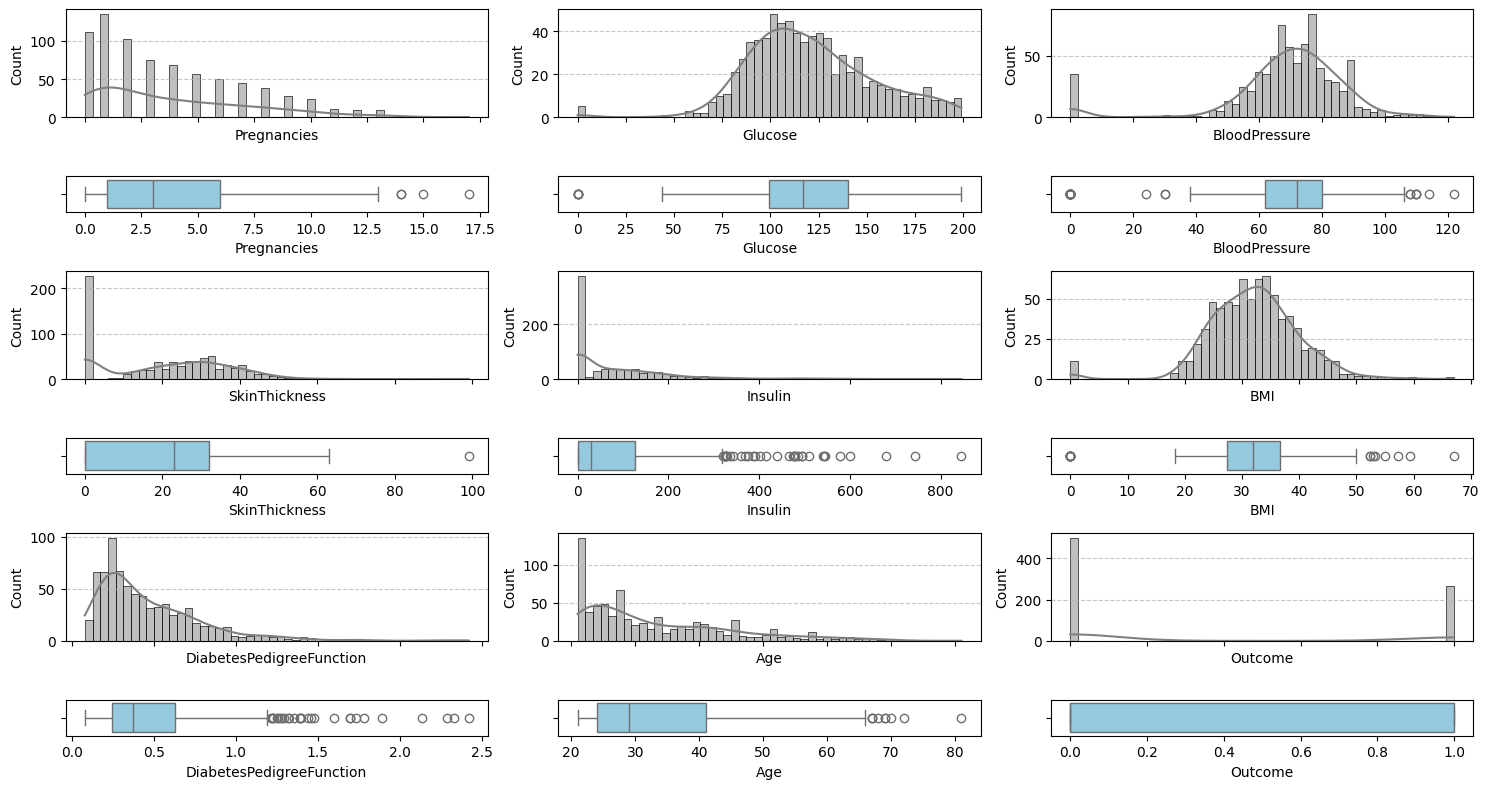

In [45]:
# Análisis univariado
numeric_var = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

cols = 3
rows = int(np.ceil(len(numeric_var)/cols))
total_rows = rows * 2

fig, axis = plt.subplots (total_rows, cols, figsize = (15, 8),
                          gridspec_kw={'height_ratios': [6, 2] * rows})

for i, var in enumerate(df.columns):
    col = i % cols
    row = int(i / cols) * 2
    ax = axis[row, col]  # Seleccionar el eje correspondiente

    ax_hist = axis[row, col]     # Histograma
    ax_box = axis[row + 1, col]  # Boxplot

    # Histograma
    sns.histplot(ax=ax_hist, data=df, x=var, bins=50, color="grey", kde=True)
    ax_hist.yaxis.grid(True, linestyle="--", alpha=0.7)
    ax_hist.set_xticklabels([], visible=False)  # Ocultar etiquetas del histograma

    # Boxplot
    sns.boxplot(ax=ax_box, data=df, x=var, color="skyblue")

plt.tight_layout()
plt.show()

In [46]:
variables = df.columns.tolist()
variables.remove('Outcome')
print(variables)

['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [47]:
df['Outcome'] = df['Outcome'].astype('category')
df['Outcome'] = df['Outcome'].map({1: 'Positivo', 0: 'Negativo'})


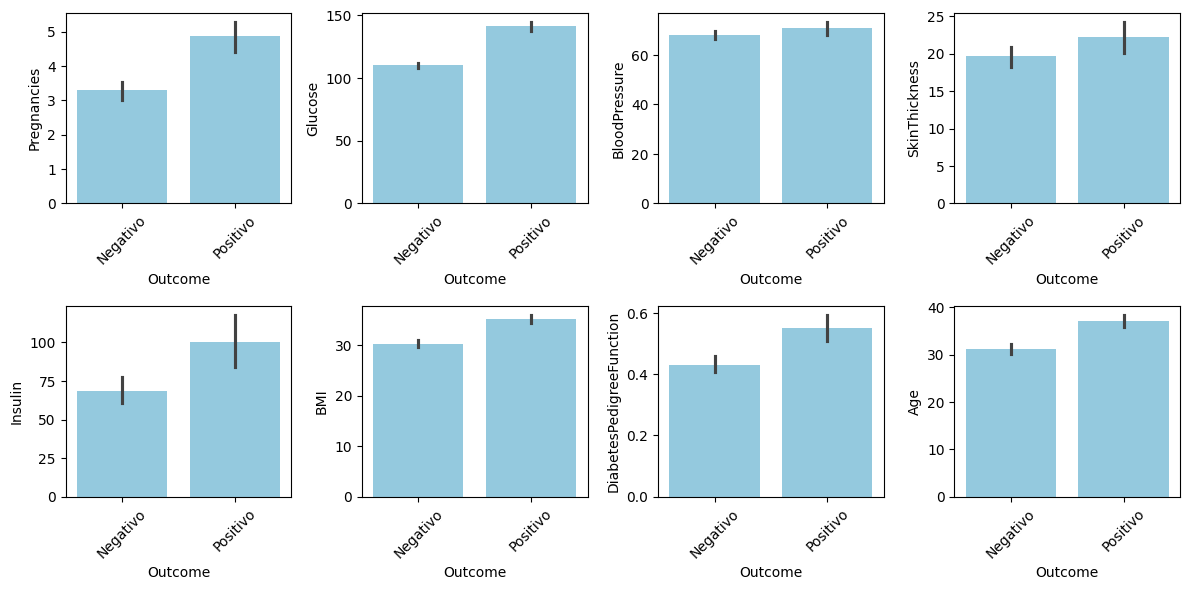

In [48]:
# Análisis multivariado numerica - y
col2 = 4
rows = int(np.ceil(len(variables)/col2))

fig, axis = plt.subplots (rows, col2, figsize = (12, 6))

for i, var in enumerate(variables):
    row, col = divmod(i, col2)
    ax = axis[row, col]

    sns.barplot(ax=ax, data=df, x='Outcome', y=var, estimator=np.mean, color = 'skyblue')
    ax.tick_params(axis='x', rotation=45)  # Rotar etiquetas si es necesario


plt.tight_layout()
plt.show()



In [49]:
# Calcular la correlación de todas las variables con Outcome
df['Outcome'] = pd.factorize(df['Outcome'])[0]

correlation = df.corr()["Outcome"].abs()
print (correlation)

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64


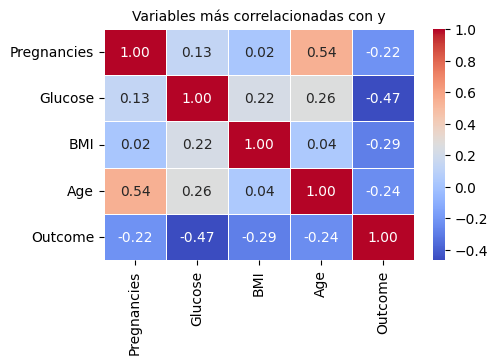

In [50]:
# Seleccionar solo las variables con correlación alta (mayor a 0.2 por ejemplo)
correlacion_fuerte = correlation[correlation > 0.2].index

# Crear un heatmap solo con estas variables
plt.figure(figsize=(5, 3))
sns.heatmap(df[correlacion_fuerte].corr(), cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5)

# Título
plt.title("Variables más correlacionadas con y", fontsize=10)

# Mostrar el gráfico
plt.show()

## Entrenamientos

In [67]:
from sklearn.model_selection import train_test_split

X = df.drop('Outcome', axis = 1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [95]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(random_state = 42)
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

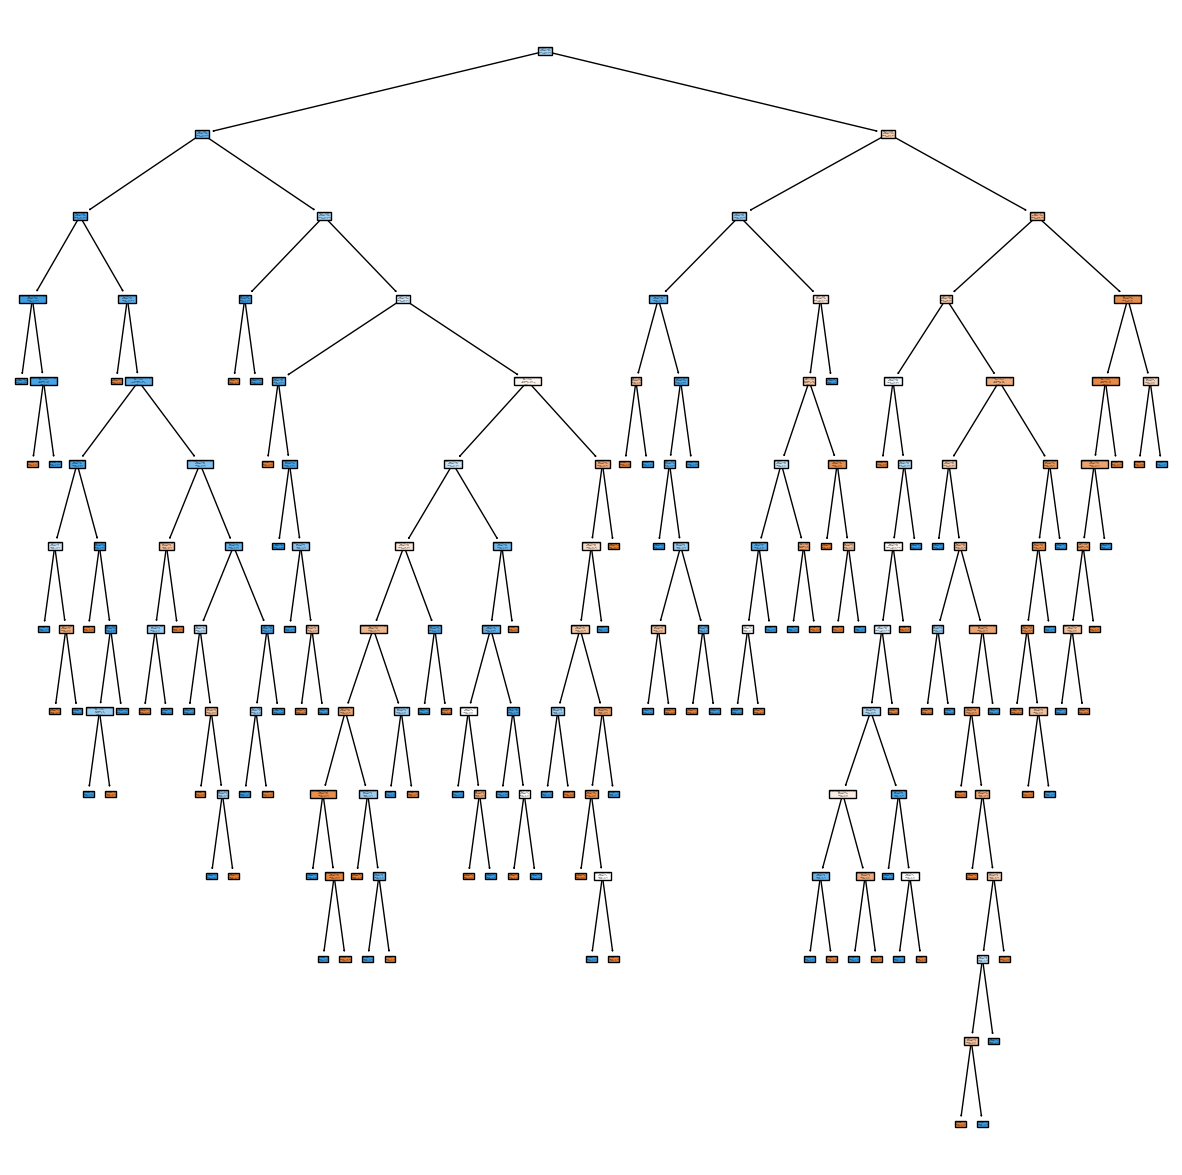

In [69]:
from sklearn import tree

fig = plt.figure(figsize=(15,15))

tree.plot_tree(model_dt, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [111]:
# Saco la predicción del modelo train y mido accuracy
y_pred_dt = model_dt.predict(X_test)

# Determino ajuste del modelo
from sklearn.metrics import accuracy_score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Precisión del modelo : {accuracy_dt:.4f}')

Precisión del modelo : 0.7468


In [97]:
# Guardo el modelo
from pickle import dump
dump(model, open("decision_tree_classifier_default_42.sav", "wb"))

#### **Random Forest**

In [98]:
# Importo módulo para crear el modelo
from sklearn.ensemble import RandomForestClassifier

rfs = RandomForestClassifier(random_state = 42)
rfs.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [99]:

pred_rfs = rfs.predict(X_test)

# Cálculo el accuracy del modelo entrenado
accuracy_rfs = accuracy_score(y_test, pred_rfs)
print(f'Precisión del modelo optimizado: {accuracy_rfs:.4f}')


Precisión del modelo optimizado: 0.7208


In [100]:
# Hiperparametrización
from sklearn.model_selection import GridSearchCV

# Definir el modelo
rfh = RandomForestClassifier()

# Definir la rejilla de hiperparámetros
param_grid_rfh = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Configurar Grid Search
grid_search_rfh = GridSearchCV(rf, param_grid_rfh, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_rfh.fit(X_train, y_train)

# Mejor combinación de hiperparámetros
print(grid_search.best_params_)

{'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}


In [101]:
from sklearn.ensemble import RandomForestClassifier

# Definir el modelo con los mejores hiperparámetros
best_rfh = RandomForestClassifier(
    n_estimators=50,
    max_depth=20,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='log2',
    random_state=42
)

# Entrenar el modelo con los datos de entrenamiento
best_rfh.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features='log2', min_samples_split=5,
                       n_estimators=50, random_state=42)

In [102]:
y_pred_rfh = best_rf.predict(X_test)

# Evaluar la precisión
accuracy_rfh = accuracy_score(y_test, y_pred_rfh)
print(f'Precisión del modelo optimizado: {accuracy_rfh:.4f}')

Precisión del modelo optimizado: 0.7468


In [103]:
dump(best_rf, open("randomforest_classifier_n300_42.sav", "wb"))

####**Boosting Algorithm**

In [104]:
from xgboost import XGBClassifier

model_xg = XGBClassifier(random_state = 42)
model_xg.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [105]:
y_pred_xg = model_xg.predict(X_test)

accuracy_xg = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo optimizado: {accuracy_xg:.4f}')

Precisión del modelo optimizado: 0.7078


In [106]:
# Hiperparametrización del modelo
param_grid_xg = {
    'n_estimators': [100, 300, 500],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

model_xgh = XGBClassifier()
grid_search_xgh = GridSearchCV(model_xgh, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_xgh.fit(X_train, y_train)

print("Mejores parámetros:", grid_search_xgh.best_params_)

Mejores parámetros: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:09:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


In [108]:
best_model_xgh = XGBClassifier(n_estimators=100, max_depth=20, max_features = 'sqrt')
best_model_xgh.fit(X_train, y_train)

y_pred_xgh = best_model_xgh.predict(X_test)
accuracy_xgh = accuracy_score(y_test, y_pred)
print(f"Precisión final: {accuracy_xgh:.4f}")

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [11:10:32] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "max_features" } are not used.

  warnings.warn(smsg, UserWarning)


Precisión final: 0.7078


####**Sintesis de modelos**

In [113]:
comparacion_modelos = pd.DataFrame({
    "Modelo": ["Arból de decisión", "Random Forest (Small)", "Random Forest (Hiper)", "XGBoost", "XGBoost (Hiper)"],
    "Accuracy": [accuracy_dt, accuracy_rfs, accuracy_rfh, accuracy_xg, accuracy_xgh]
})

# Mostrar la tabla
print(comparacion_modelos)

                  Modelo  Accuracy
0      Arból de decisión  0.746753
1  Random Forest (Small)  0.720779
2  Random Forest (Hiper)  0.746753
3                XGBoost  0.707792
4        XGBoost (Hiper)  0.707792


El modelo que reporta los mejores niveles de acccuracy son el arbol de decisión y random forest hiperparametrizado